# Array ADT

```C
#include <stdio.h>
#include <stdlib.h>
#include <stdbool.h>

struct Array {
  
  int* A;
  int capacity;
  int currLength;
  
};

void display(struct Array arr) {

    /* 
        
        O(n) 
    
    */
    

    if(arr.currLength == 0) { 
        printf("Array is empty\n");
    }
    else
    {
        
        for(int i=0;i<arr.currLength;i++){
            printf("%d ",*(arr.A+i));
        }
        printf("\n");
    }
}

void append(struct Array* arr, int value) { 

    /*

        O(1)

    */
        
    if(arr->currLength < arr->capacity) {
        *(arr->A+arr->currLength) = value;
        (arr->currLength)++;
    }
    else {
        printf("Array has reached full capacity\n");
    }
}

void insert(struct Array* arr, int index, int value) { // min O(1), max O(n)

    /*
    
        Best Case - Inserting at End of array; no shifting needed O(1)
        Worst Case - Inserting at start of array; shift n elements O(n)

    */

    if(arr->currLength < arr->capacity) {
        
        if(0 <= index && index <= arr->currLength) { 
            
            int counter;
            for(counter=arr->currLength;counter>index;counter--) { 
                arr->A[counter] = arr->A[counter-1]; // shift elements
            }
            arr->A[index] = value;
            arr->currLength++;
        }
        else {
            printf("Index out of bounds\n");
        }
    }
    else {
        printf("Array has reached full capacity\n");
    }
}

void insertSorted(struct Array* arr, int value){
    int i= arr->currLength-1;
    while(arr->A[i]>value){
        i--;
    }  
    insert(arr,i+1,value);
}


int pop(struct Array *arr) { // O(1)
    
    if(arr->currLength > 0){
        int value = arr->A[arr->currLength-1];
        arr->currLength--;
        return value;
    }

    printf("No elements in Array\n");
    return 0;
        
}

int delete(struct Array *arr, int index) { // min O(1), max(n)

    /*
    
        Best Case - Deleting element at End of array; no shifting needed O(1)
        Worst Case - Deleting element at start of array; shift n elements O(n)

    */
    
    if(arr->currLength > 0){
        if(0 <= index && index <= arr->currLength-1){
            int value = arr->A[index];
            for(int counter=index; counter<arr->currLength-1;counter++){
                arr->A[counter] = arr->A[counter+1]; // shift elements
            }
            arr->currLength--;
            return value;
        }
        printf("Index out of bounds\n");
        return 0;
    }
    printf("No elements in Array\n");
    return 0;
}

int linearSearch(struct Array arr, int value) {

    /*
    
        Best Case - Key at start of Array; O(1)
        Worst Case - Key at end of Array; shift n elements O(n)
        Average Case - O(n)
        Unsuccessful Search - O(n)

    */

    for(int i=0; i<arr.currLength;i++) {
        if(arr.A[i] == value) {
            printf("Value found at index %d\n",i);
            return i;
        }
    }
    printf("Search Unsuccesssful\n");
    return -1;
    
}

void swap(int* a, int* b){
    int temp = *a;
    *a = *b;
    *b = temp;
}

void rearrange(struct Array* arr){
    
    // -ve on left side
    // O(n)
    // no. of comparisons is n+2
    // no. of swaps is dependent

    int i = 0;
    int j = arr->currLength-1;

    while(i<j){
        while(arr->A[i]<0) i++;
        while(arr->A[j]>=0) j--;
        if(i<j) swap(&arr->A[i],&arr->A[j]);
    }
}

int linearSearch2(struct Array* arr, int value) { 

   // using Transposition

    for(int i=0; i<arr->currLength;i++) {
        if(arr->A[i] == value) {
            if(i != 0) {
                swap(&arr->A[i],&arr->A[i-1]);
                printf("Value present at index %d\n",i-1);
                return i-1;
            }
            printf("Value present at index %d\n",0);
            return 1;
        }
    }
    printf("Search Unsuccesssful\n");
    return -1;
    
}

int linearSearch3(struct Array* arr, int value) { 

   // using move to front

    for(int i=0; i<arr->currLength;i++) {
        if(arr->A[i] == value) {
            swap(&arr->A[i],&arr->A[0]);
            printf("Value present at index %d\n",0);
            return 0;
        }
    }
    printf("Search Unsuccesssful\n");
    return -1;
    
}

bool isSorted(struct Array arr) {
    for(int i=0;i<arr.currLength-1;i++){
        if(arr.A[i]>arr.A[i+1]){
            return false;
        }
    }
    return true;
}

int binarySearch(struct Array arr,int value) {

    // Best Case O(1)
    // Worst Case O(logN)
    // Unsuccessful Search O(logN)

    // pre-requisite: arr must be sorted
    int l = 0;
    int h = arr.currLength-1;
    int mid;

    while(l<=h){
        mid = (l+h)/2;
        printf("l: %d, h: %d, mid: %d\n",l,h,mid);
    
        if(arr.A[mid] == value) {
            printf("Value found at position %d\n",mid);
            return mid;
        }
        else if(value<arr.A[mid]){
            h = mid-1;
        }
        else{
            l = mid+1;
        }
    }
    printf("Search Unsuccessful\n");
    return -1;
}

int rBinSearch(struct Array arr, int l, int h, int value) {

    // Best Case O(1)
    // Worst Case O(logN)
    // Unsuccessful Search O(logN)

    // pre-requisite: arr must be sorted
    int mid;
    if(l<=h){
        mid = (l+h)/2;
    
        if(arr.A[mid] == value) {
            printf("Value found at position %d\n",mid);
            return mid;
        }
        else if(value<arr.A[mid]){
            return rBinSearch(arr,l,mid-1,value);
        }
        else{
            return rBinSearch(arr,mid+1,h,value);
        }
    }
    printf("Search Unsuccessful\n");
    return -1;
}

int get(struct Array arr, int index) {
    if (0<=index  && index <= arr.currLength-1) {
        return arr.A[index];
    }
    printf("Index out of bounds\n");
    return 0;
}

void set(struct Array* arr, int index, int value) {
    if (0<=index  && index <= arr->currLength-1) {
        arr->A[index] = value;
    }
    else{
        printf("Index out of bounds\n");
    }
}

int max(struct Array arr) {
    int max = arr.A[0];
    for(int i=1;i<arr.currLength;i++){
        if(arr.A[i] > max){
            max = arr.A[i];
        }
    }
    return max;
}

int min(struct Array arr) {
    int min = arr.A[0];
    for(int i=1;i<arr.currLength;i++){
        if(arr.A[i] < min){
            min = arr.A[i];
        }
    }
    return min;
}

int sum(struct Array arr) {
    int sum = 0;
    for(int i=0;i<arr.currLength;i++){
        sum+=arr.A[i];
    }
    return sum;
}

int rSum(struct Array arr, int n) {
    if(n<0){
        return 0;
    }
    else {
        return rSum(arr,n-1)+arr.A[n];
    }
}


double avg(struct Array arr) {
    return (double)sum(arr)/arr.currLength;
}

void reverse(struct Array* arr) {

    // O(n)
    // using intermediate array

    int* temp = (int*)malloc(arr->currLength*sizeof(int));

    for(int i=arr->currLength-1,j=0;i>=0;i--,j++){
        temp[j] = arr->A[i];
    }
    for(int k=0;k<arr->currLength;k++){
        arr->A[k] = temp[k];
    }
    free(temp);
}

void reverse2(struct Array* arr) {

    // O(n)

    int i = 0;
    int j = arr->currLength-1;
    int temp;
    while(i < j) {
        swap(&arr->A[i],&arr->A[j]);
        i++;
        j--;
    }
}

void leftShift(struct Array* arr){
    static int j=0;

    if(j == arr->currLength){
        arr->currLength=0;
    }
    else {
        for(int i=0;i<arr->currLength-1-j;i++){
            arr->A[i]=arr->A[i+1];
        }
        arr->A[arr->currLength-1-j] = 0;
        j++;
    }
    
}

void leftRotate(struct Array* arr){

    int temp = arr->A[0];
    for(int i=0;i<arr->currLength-1;i++){
        arr->A[i]=arr->A[i+1];
    }
    arr->A[arr->currLength-1] = temp;
  
}

void rightShift(struct Array* arr){
    static int j=0;

    if(j == arr->currLength){

        arr->currLength=0;
    }
    else {
        for(int i=arr->currLength-1;i>j;i--){
            arr->A[i]=arr->A[i-1];
        }
        arr->A[j] = 0;
        j++;
    }
    
}

void rightRotate(struct Array* arr){
    
    int temp = arr->A[arr->currLength-1];

    for(int i=arr->currLength-1;i>0;i--){
        arr->A[i]=arr->A[i-1];
    }
    arr->A[0] = temp;   
}



struct Array* merge(struct Array* arr1, struct Array* arr2) {

    // pre-requisite Sorted arrays
    // copying m+n elements
    // Thetha(m+n) where m and n are the sizes of the arrays.
    
    struct Array* temp = (struct Array*)malloc(sizeof(struct Array));
    temp->capacity = arr1->currLength+arr2->currLength;
    temp->A = (int*)malloc(temp->capacity*sizeof(int));

    int i=0,j=0,k=0;

    while(i<arr1->currLength && j<arr2->currLength){
        
        if(arr1->A[i]<=arr2->A[j]) temp->A[k++]=arr1->A[i++];
        if(arr2->A[j]<arr1->A[i]) temp->A[k++]=arr2->A[j++];
    }
    for(;i<arr1->currLength;i++) temp->A[k++] = arr1->A[i];
    for(;j<arr2->currLength;j++) temp->A[k++] = arr2->A[j];

    temp->currLength = arr1->currLength+arr2->currLength;

    return temp;
}


bool membership(struct Array arr, int value){
    for(int i = 0; i<arr.currLength;i++){
        if(arr.A[i]==value) return true;
    }
    return false;
}


struct Array* Union(struct Array* arr1, struct Array* arr2){

    struct Array* temp = (struct Array*)malloc(sizeof(struct Array));
    temp->capacity = arr1->currLength+arr2->currLength;
    temp->A = (int*)malloc(temp->capacity*sizeof(int));

    if(!( isSorted(*arr1) && isSorted(*arr2) )){
        // unsorted arrays
        // m * m*n approx O(n^2)
            
        for(int i=0;i<arr1->currLength;i++,temp->currLength++) temp->A[i]=arr1->A[i];

        for(int j=0;j<arr2->currLength;j++){
            if(!membership(*temp,arr2->A[j])){
                temp->A[temp->currLength++] = arr2->A[j];
            }
        }
        
    }
    else{
        
        // sorted arrays
        // Thetha(m+n) approx O(n)
            
        int i=0,j=0,k=0;

        while(i<arr1->currLength && j<arr2->currLength){
        
            if(arr1->A[i]<arr2->A[j]){ 
                temp->A[k++]=arr1->A[i++];
                temp->currLength++;
            }
            else if(arr1->A[i]==arr2->A[j]) {
                temp->A[k++]=arr1->A[i++];
                j++;
                temp->currLength++;
            }
            else{
                temp->A[k++]=arr2->A[j++];
                temp->currLength++;
            }
        }

        for(;i<arr1->currLength;i++,temp->currLength++) temp->A[k++] = arr1->A[i];
        for(;j<arr2->currLength;j++,temp->currLength++) temp->A[k++] = arr2->A[j];

    }


    return temp;

}

struct Array* Intersection(struct Array* arr1, struct Array* arr2){

    struct Array* temp = (struct Array*)malloc(sizeof(struct Array));
    temp->capacity = arr1->currLength+arr2->currLength;
    temp->A = (int*)malloc(temp->capacity*sizeof(int));

    if(!( isSorted(*arr1) && isSorted(*arr2) )){
        // unsorted arrays
        // n*m approx O(n^2)
            
        int counter=0;
        for(int i=0;i<arr1->currLength;i++){
            if(membership(*arr2,arr1->A[i])){
                temp->A[counter++] = arr1->A[i];
                temp->currLength++;
            }
        }
        
    }
    else{
        
        // sorted arrays
        // Thetha(m+n) approx O(n)
            
        int i=0,j=0,k=0;

        while(i<arr1->currLength && j<arr2->currLength){
        
            if(arr1->A[i]<arr2->A[j]){
                i++;
            }
            else if(arr2->A[j]<arr1->A[i]){
                j++;
            }
            else {
                temp->A[k++] = arr1->A[i++];
                j++;
                temp->currLength++;
            }
        }

    }


    return temp;

}

struct Array* difference(struct Array* arr1, struct Array* arr2){

    struct Array* temp = (struct Array*)malloc(sizeof(struct Array));
    temp->capacity = arr1->currLength+arr2->currLength;
    temp->A = (int*)malloc(temp->capacity*sizeof(int));

    if(!( isSorted(*arr1) && isSorted(*arr2) )){
        // unsorted arrays
        // m*n approx O(n^2)
            
        int counter=0;
        for(int i=0;i<arr1->currLength;i++){
            if(!membership(*arr2,arr1->A[i])){
                temp->A[counter++] = arr1->A[i];
                temp->currLength++;
            }
        }
        
    }
    else{
        
        // sorted arrays
        // Thetha(m+n) approx O(n)
            
        int i=0,j=0,k=0;

        while(i<arr1->currLength && j<arr2->currLength){
        
            if(arr1->A[i]<arr2->A[j]){
                
                temp->A[k++] = arr1->A[i++];
                temp->currLength++;
            }
            else if(arr2->A[j]<arr1->A[i]){
                j++;
            }
            else {
                i++;
                j++;
            }
        }
        for(;i<arr1->currLength;i++,temp->currLength++) temp->A[k++] = arr1->A[i];

    }


    return temp;

}




int main() {
    
  // Array structure and lot of Array/Set methods have been implemented
  // Possible Additions/Modifications:
    // 1. write a isSet validation function to check if a given Array is a Set before performing Set operations.
    // 2. check for validation in all functions, may need to add few validations for edge cases
    // 3. create a menu driven program to easily call all the functions

  // Make sure to create Array Structure before running program and make sure to deallocate memory after use.
    
  return 0;
}
```

## Menu Example

In [415]:
from IPython.display import Image

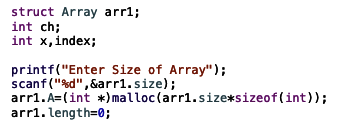

In [416]:
Image(filename='./resources/menu-pt1.png')

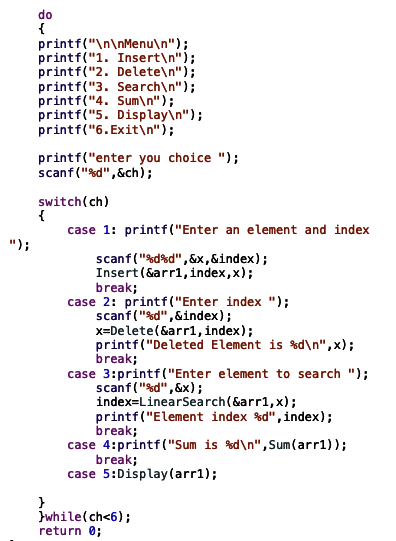

In [417]:
Image(filename='./resources/menu-pt2.png')